In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [53]:
#import scraped csv
ufc_df = pd.read_csv('fights_stats.csv')

In [95]:
# replace values
ufc_df.replace('--', np.nan, inplace=True)

# drop any rows with missing values
ufc_df.dropna(inplace=True)

# copy of original
ufc_clean = ufc_df.copy()

# create Winner_Red column: 1 if Red won, else 0
ufc_clean['Winner_Red'] = ufc_clean['Winner'].apply(lambda x: 1 if x == 'Red' else 0)

# remove % from striking accuracy and takedown defense and convert to float
ufc_clean['RedStrikingAcc'] = ufc_clean['RedStrikingAcc'].astype(str).str.replace('%', '').astype(float) / 100
ufc_clean['BlueStrikingAcc'] = ufc_clean['BlueStrikingAcc'].astype(str).str.replace('%', '').astype(float) / 100
ufc_clean['RedTakedownDef'] = ufc_clean['RedTakedownDef'].astype(str).str.replace('%', '').astype(float) 
ufc_clean['BlueTakedownDef'] = ufc_clean['BlueTakedownDef'].astype(str).str.replace('%', '').astype(float) 

# remove " from height and reach and convert to float
for col in ['RedHeight', 'RedReach', 'BlueHeight', 'BlueReach']:
    ufc_clean[col] = ufc_clean[col].astype(str).str.replace('"', '').astype(float)

# reset index after dropping rows
ufc_clean.reset_index(drop=True, inplace=True)


# Bivariate Analysis

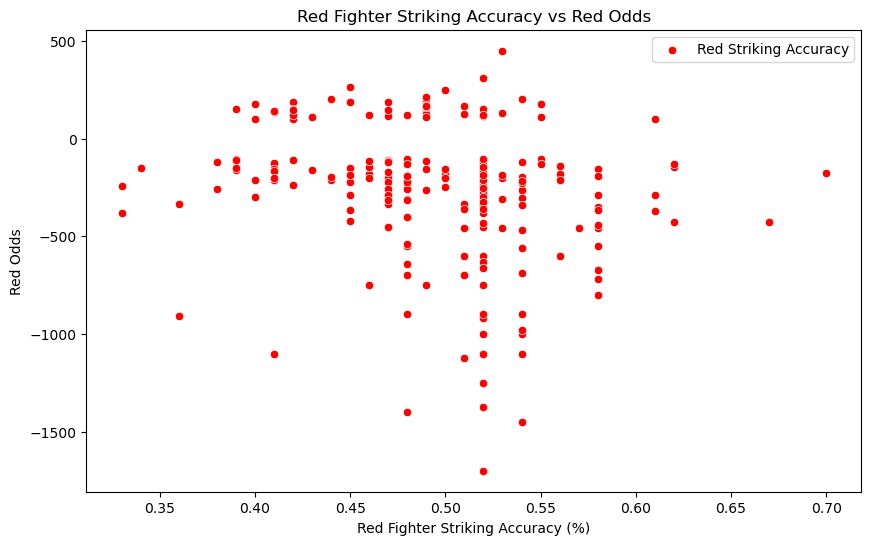

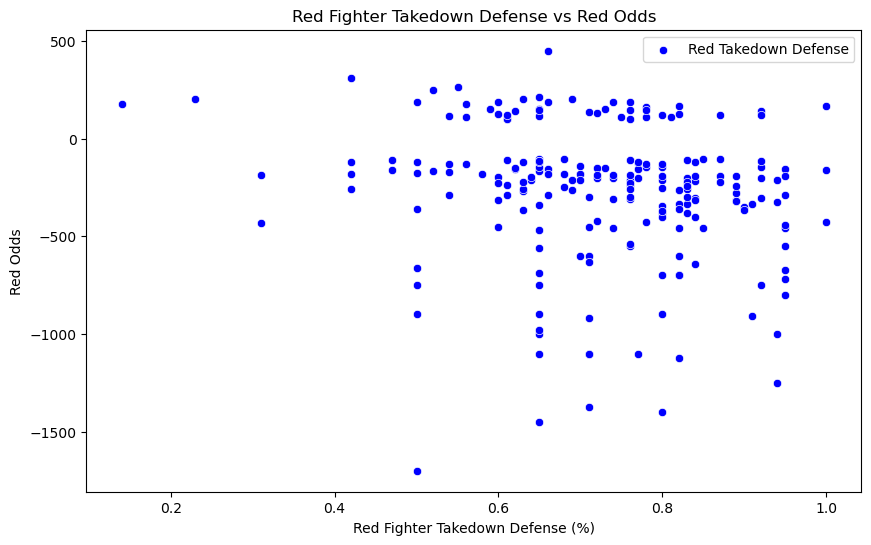

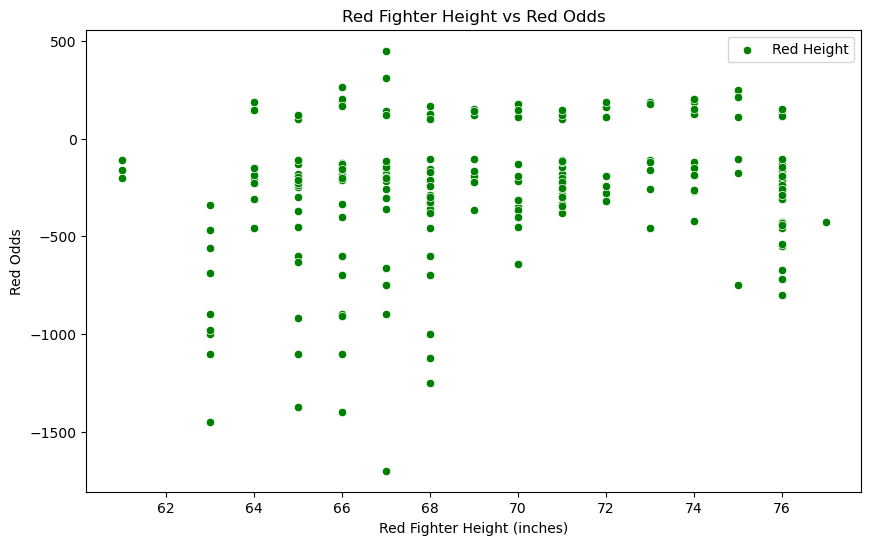

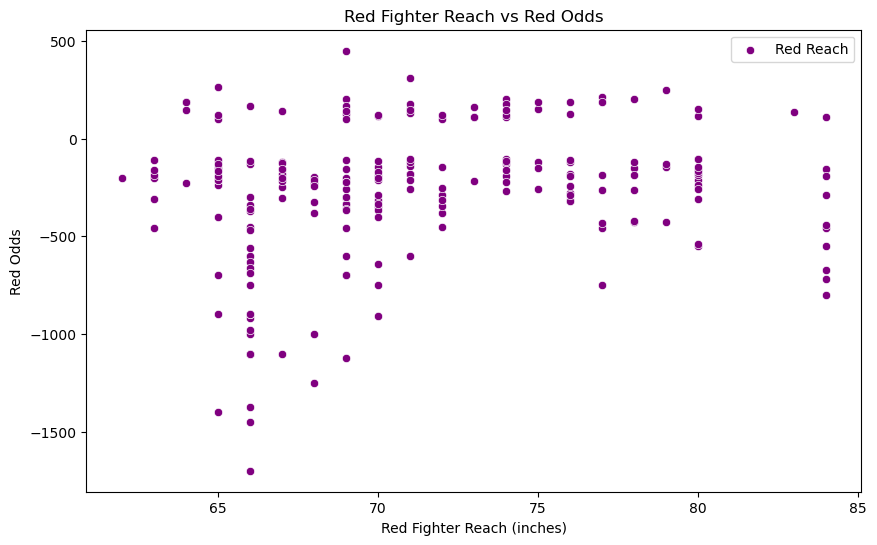

In [97]:
#Bivaria

# RedOdds vs RedStrikingAcc
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ufc_clean['RedStrikingAcc'], y=ufc_clean['RedOdds'], color='red', label='Red Striking Accuracy')
plt.title('Red Fighter Striking Accuracy vs Red Odds')
plt.xlabel('Red Fighter Striking Accuracy (%)')
plt.ylabel('Red Odds')
plt.show()

# RedOdds vs RedTakedownDef
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ufc_clean['RedTakedownDef'], y=ufc_clean['RedOdds'], color='blue', label='Red Takedown Defense')
plt.title('Red Fighter Takedown Defense vs Red Odds')
plt.xlabel('Red Fighter Takedown Defense (%)')
plt.ylabel('Red Odds')
plt.show()

# RedOdds vs RedHeight
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ufc_clean['RedHeight'], y=ufc_clean['RedOdds'], color='green', label='Red Height')
plt.title('Red Fighter Height vs Red Odds')
plt.xlabel('Red Fighter Height (inches)')
plt.ylabel('Red Odds')
plt.show()

# RedOdds vs RedReach
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ufc_clean['RedReach'], y=ufc_clean['RedOdds'], color='purple', label='Red Reach')
plt.title('Red Fighter Reach vs Red Odds')
plt.xlabel('Red Fighter Reach (inches)')
plt.ylabel('Red Odds')
plt.show()


# Machine Learning

In [99]:
# selecting features and target variable
features = ['RedStrikingAcc', 'RedTakedownDef', 'RedHeight', 'RedReach', 'BlueStrikingAcc', 'BlueTakedownDef', 'BlueHeight', 'BlueReach']
X = ufc_clean[features]
y = ufc_clean['Winner']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Location,Winner,WeightClass,Gender,NumberOfRounds,...,RedTakedownDef,RedHeight,RedReach,RedStance,BlueStrikingAcc,BlueTakedownDef,BlueHeight,BlueReach,BlueStance,Winner_Red
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,12/7/24,"Las Vegas, Nevada, USA",Red,Flyweight,MALE,5,...,0.68,65.0,67.0,Orthodox,0.58,0.57,68.0,69.0,Orthodox,1
1,Jon Jones,Stipe Miocic,-550.0,410.0,11/16/24,"New York City, New York, USA",Red,Heavyweight,MALE,5,...,0.95,76.0,84.0,Orthodox,0.52,0.65,76.0,80.0,Orthodox,1
2,Ilia Topuria,Max Holloway,-305.0,245.0,10/26/24,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Red,Featherweight,MALE,5,...,0.92,67.0,69.0,Orthodox,0.47,0.83,71.0,69.0,Orthodox,1
3,Alex Pereira,Khalil Rountree Jr.,-425.0,330.0,10/5/24,"Salt Lake City, Utah, USA",Red,Light Heavyweight,MALE,5,...,0.78,76.0,79.0,Orthodox,0.38,0.58,73.0,76.0,Southpaw,1
4,Raquel Pennington,Julianna Pena,-155.0,130.0,10/5/24,"Salt Lake City, Utah, USA",Blue,Women's Bantamweight,FEMALE,5,...,0.62,67.0,67.0,Orthodox,0.44,0.23,66.0,69.0,Orthodox,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Chad Laprise,Olivier Aubin-Mercier,145.0,-155.0,4/16/14,"Quebec City, Quebec, Canada",Red,Welterweight,MALE,3,...,0.78,70.0,71.0,Orthodox,0.51,0.70,69.0,70.0,Southpaw,1
211,Johny Hendricks,Robbie Lawler,-365.0,328.0,3/15/14,"Dallas, Texas, USA",Red,Welterweight,MALE,5,...,0.63,69.0,69.0,Southpaw,0.47,0.65,71.0,74.0,Southpaw,1
212,Ronda Rousey,Sara McMann,-360.0,325.0,2/22/14,"Las Vegas, Nevada, USA",Red,Women's Bantamweight,FEMALE,5,...,0.50,67.0,66.0,Orthodox,0.46,0.50,66.0,66.0,Orthodox,1
213,Renan Barao,Urijah Faber,-335.0,305.0,2/1/14,"Newark, New Jersey, USA",Red,Bantamweight,MALE,5,...,0.91,66.0,70.0,Orthodox,0.40,0.58,66.0,67.0,Orthodox,1


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# initialize the regression model
log_reg_model = LogisticRegression()

# train the model
log_reg_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# classification report
print(classification_report(y_test, y_pred))


Accuracy: 72.09%
              precision    recall  f1-score   support

        Blue       0.80      0.27      0.40        15
         Red       0.71      0.96      0.82        28

    accuracy                           0.72        43
   macro avg       0.76      0.62      0.61        43
weighted avg       0.74      0.72      0.67        43



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
